# **CodesOnBytes - Data Science Internship**

# **Phase 1 : Task 2**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

### Problem Statement: Clean the dataset replace missing values, remove outliers etc.

### Dataset link: https://docs.google.com/spreadsheets/d/e/2PACX-1vTSS-TcErkXNk8KB0AlijhitwetxeHD2M3R0HJl2QPMAyFq0fxFX4PFKnzAWLDnratIz67DNL6GsZnV/pub?output=csv

### Importing the neccesary Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the dataset and getting info about it

In [ ]:
data = pd.read_csv('/content/netflix1.csv')

In [ ]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.shape

(8790, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

**There are no null or NAN values in the dataset**

In [10]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


### Data Visualization

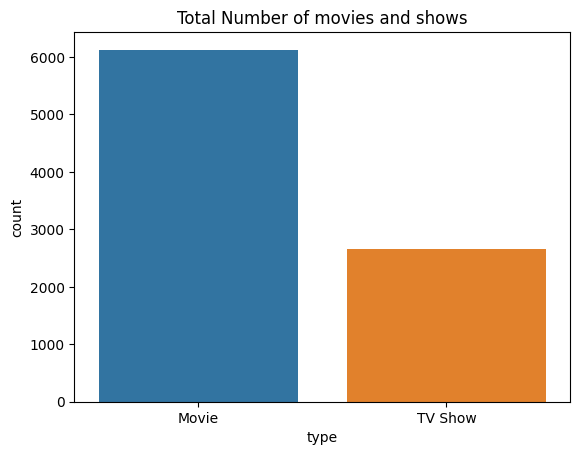

In [17]:
sns.countplot(x='type',data=data)
plt.title('Total Number of movies and shows')
plt.show()

In [29]:
data['year_added'] = pd.DatetimeIndex(data['date_added']).year
data['month_added'] = pd.DatetimeIndex(data['date_added']).month
data['day_added'] = pd.DatetimeIndex(data['date_added']).day

<Axes: xlabel='count', ylabel='year_added'>

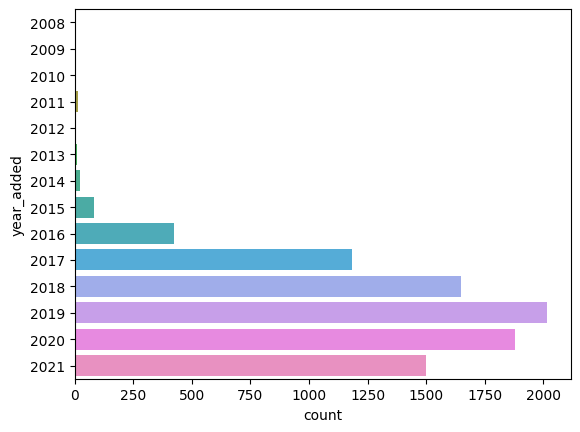

In [31]:
sns.countplot(data = data ,y = data['year_added'])

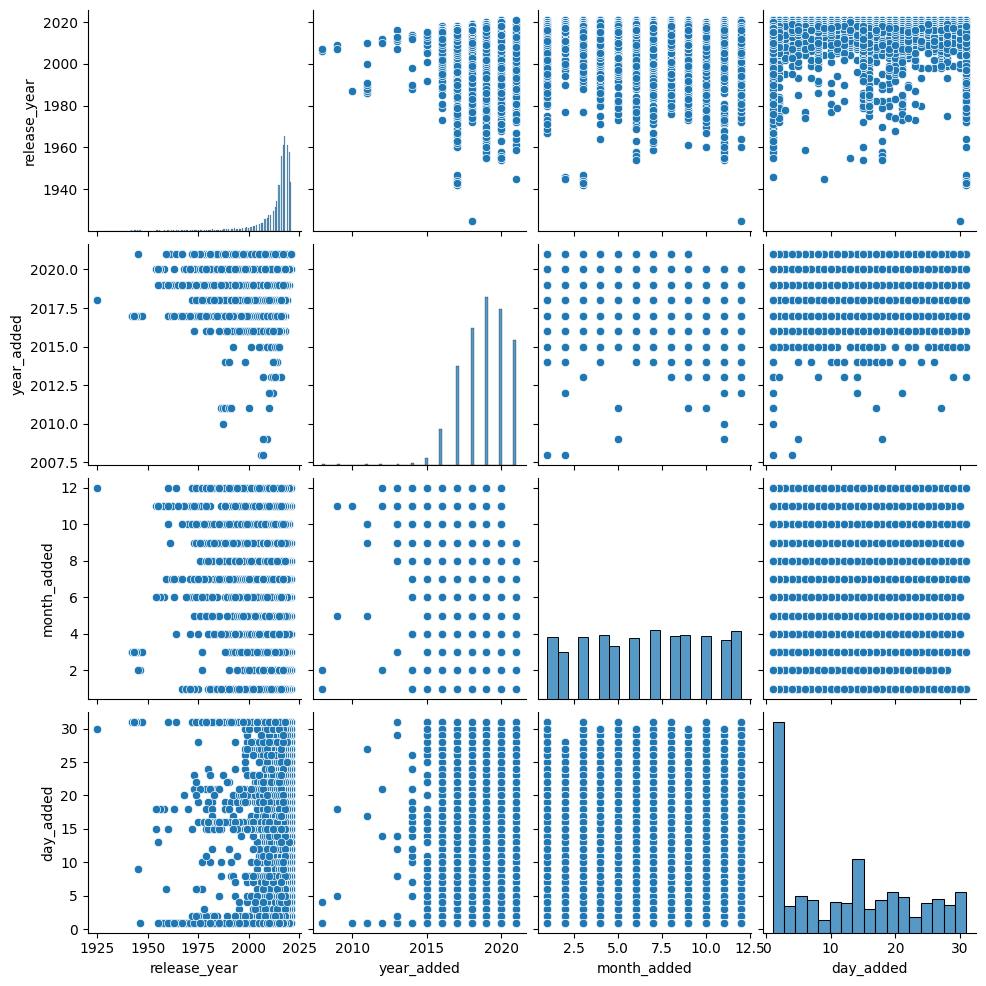

In [32]:
sns.pairplot(data, markers=['o', 's', 'D', 'P'])
plt.show()

<Axes: xlabel='release_year'>

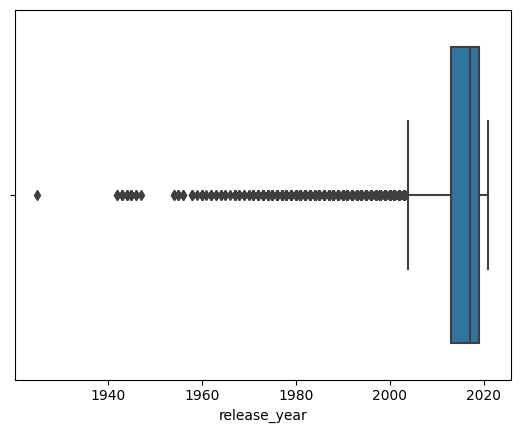

In [34]:
sns.boxplot(x=data['release_year'])

**We can see there some outliers in the dataset**

<Axes: xlabel='release_year', ylabel='Count'>

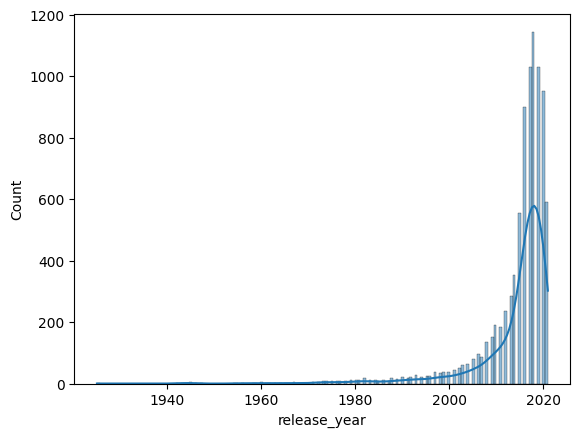

In [13]:
sns.histplot(x=data['release_year'],kde=True)

### Handling Outliers

In [35]:
#Setting upper limit and lower to finding the range of outliers
percentile25=data["release_year"].quantile(0.25)
percentile75=data["release_year"].quantile(0.75)
IQR = percentile75-percentile25

upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

In [36]:
data[data["release_year"]>upper_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added


In [37]:
data[data["release_year"]<lower_limit]

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,day_added
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,24
29,s25,Movie,Jeans,S. Shankar,India,9/21/2021,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",2021,9,21
51,s27,Movie,Minsara Kanavu,Rajiv Menon,India,9/21/2021,1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals",2021,9,21
53,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Not Given,9/21/2021,1996,TV-PG,161 min,"Comedies, International Movies",2021,9,21
60,s42,Movie,Jaws,Steven Spielberg,United States,9/16/2021,1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",2021,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,Not Given,Hong Kong,9/20/2018,1983,TV-14,103 min,"Action & Adventure, Dramas, International Movies",2018,9,20
8743,s8524,TV Show,The Super Mario Bros. Super Show!,Not Given,United States,5/22/2016,1989,TV-Y7,1 Season,Kids' TV,2016,5,22
8746,s8542,TV Show,The Twilight Zone (Original Series),Not Given,United States,7/1/2017,1963,TV-14,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy",2017,7,1
8761,s8645,TV Show,Twin Peaks,Not Given,United States,7/1/2017,1990,TV-14,2 Seasons,"Classic & Cult TV, Crime TV Shows, TV Dramas",2017,7,1


In [38]:
data1 = data[data["release_year"]>lower_limit]

<Axes: xlabel='release_year'>

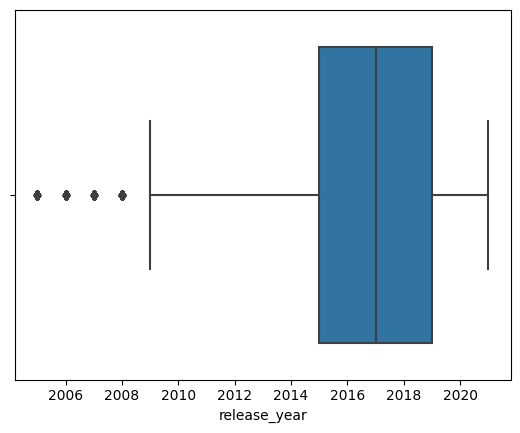

In [39]:
sns.boxplot(x=data1['release_year'])

**We handled most of the outliers but some of them are still here.**

In [40]:
percentile25=data1["release_year"].quantile(0.25)
percentile75=data1["release_year"].quantile(0.75)
IQR = percentile75-percentile25

upper_limit = percentile75 + 1.5*IQR
lower_limit = percentile25 - 1.5*IQR

<Axes: xlabel='release_year'>

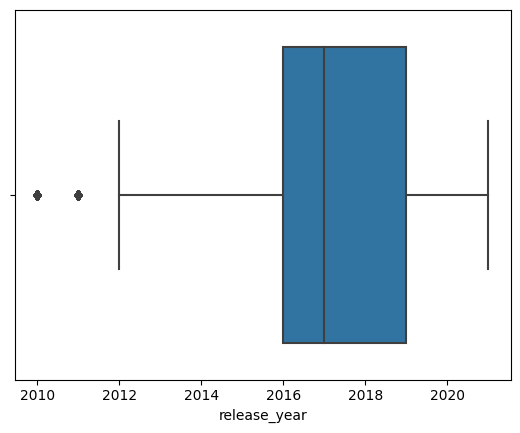

In [41]:
data2 = data1[data1["release_year"]>lower_limit]
sns.boxplot(x=data2['release_year'])

In [44]:
upper_limit = 2019.0 + 1.5*3
lower_limit = 2016.0 - 1.5*3

In [45]:
data3 = data2[data2["release_year"]>lower_limit]

<Axes: xlabel='release_year'>

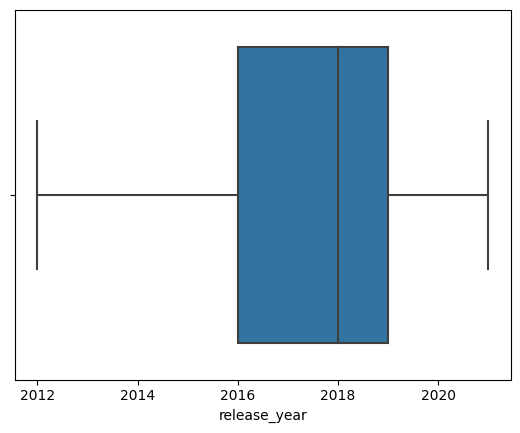

In [46]:
sns.boxplot(x=data3['release_year'])

**There are no outlier in the dataset**

<Axes: xlabel='release_year', ylabel='Count'>

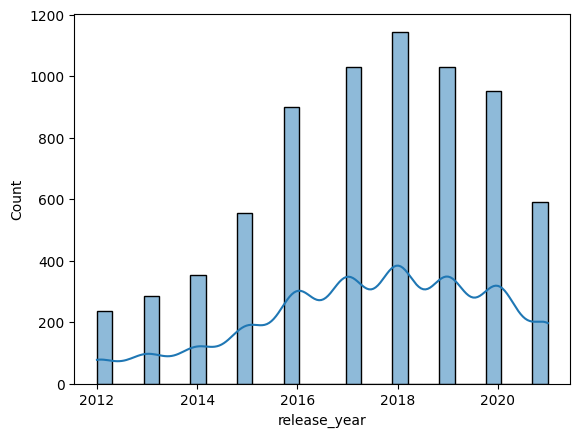

In [48]:
sns.histplot(x=data3['release_year'],kde=True)

### Saving Cleaned dataset

In [47]:
data3.to_csv('cleaned_dataset_netflix.csv', index=False)

### Conclusion : Our dataset is clean with no null or nan values and outliers. It is ready for further processes.

# **--------------------------------------------Thank You--------------------------------------------**



